In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import ants 
import nibabel as nib 
import os
import SimpleITK as sitk
from tqdm import tqdm

In [2]:
std_non_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/masked_out_STANDARD"
std_non_harm_out = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/clipped_masked_out_STANDARD"
for file in tqdm(os.listdir(std_non_harm)):
    img = nib.load(os.path.join(std_non_harm, file))
    img_data = img.get_fdata()
    img_data = np.clip(img_data, -1024, 0)

    img_clipped = nib.Nifti1Image(img_data, img.affine, img.header)
    nib.save(img_clipped, os.path.join(std_non_harm_out, file))

100%|██████████| 50/50 [06:23<00:00,  7.07s/it]


In [ ]:
#Threshold masks 

In [19]:
harmonized_train_jacobian = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/harmonized/train_jacobian_determinant_images"
non_harmonized_train_jacobian = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/train_jacobian_determinant_images"
out_histogram = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/histograms_jacobian_train"
os.makedirs(out_histogram, exist_ok=True)

harmonized_train_jacobian_list = sorted(os.listdir(harmonized_train_jacobian))
non_harmonized_train_jacobian_list = sorted(os.listdir(non_harmonized_train_jacobian)) 

mean_harmonized_series = {}
std_harmonized_series = {}
mean_non_harmonized_series = {}
std_non_harmonized_series = {}
correlation_vals = {}

for i in range(len(harmonized_train_jacobian_list)):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    harm_img = ants.image_read(os.path.join(harmonized_train_jacobian, harmonized_train_jacobian_list[i]))
    harm_img = harm_img.numpy()
    harm_img = harm_img.flatten()
    plt.hist(harm_img, bins=100, color='b', alpha=0.7, rwidth=0.85)
    plt.title("Jacobian determinant histogram for harmonized data")
    plt.xlabel("Jacobian determinant")
    plt.xlim(0, 2.0)
    plt.ylabel("Frequency")
    plt.ylim(0, 5000000)    
    plt.subplot(1, 2, 2)
    non_harm_img = ants.image_read(os.path.join(non_harmonized_train_jacobian, non_harmonized_train_jacobian_list[i]))
    non_harm_img = non_harm_img.numpy()
    non_harm_img = non_harm_img.flatten()
    plt.hist(non_harm_img, bins=100, color='r', alpha=0.7, rwidth=0.85)
    plt.title("Jacobian determinant histogram for non-harmonized data")
    plt.xlabel("Jacobian determinant")
    plt.xlim(0, 2.0)
    plt.ylabel("Frequency")
    plt.ylim(0, 5000000) 
    plt.savefig(os.path.join(out_histogram, harmonized_train_jacobian_list[i].replace(".nii.gz", ".png")))
    plt.close()

    mean_harmonized = np.mean(harm_img)
    std_harmonized = np.std(harm_img)
    mean_non_harmonized = np.mean(non_harm_img)
    std_non_harmonized = np.std(non_harm_img)

    correlation = np.corrcoef(harm_img, non_harm_img)

    ##Save the mean, std and correlation in a pandas dataframe
    mean_harmonized_series[harmonized_train_jacobian_list[i]] = mean_harmonized
    std_harmonized_series[harmonized_train_jacobian_list[i]] = std_harmonized
    mean_non_harmonized_series[non_harmonized_train_jacobian_list[i]] = mean_non_harmonized
    std_non_harmonized_series[non_harmonized_train_jacobian_list[i]] = std_non_harmonized
    correlation_vals[harmonized_train_jacobian_list[i]] = correlation[0, 1]


##Save the mean, std and correlation in a pandas dataframe
mean_harmonized_series = pd.Series(mean_harmonized_series)
std_harmonized_series = pd.Series(std_harmonized_series)
mean_non_harmonized_series = pd.Series(mean_non_harmonized_series)
std_non_harmonized_series = pd.Series(std_non_harmonized_series)
correlation_vals = pd.Series(correlation_vals)


In [9]:
df = pd.DataFrame({"mean_harmonized": mean_harmonized_series, "std_harmonized": std_harmonized_series, "mean_non_harmonized": mean_non_harmonized_series, "std_non_harmonized": std_non_harmonized_series, "correlation": correlation_vals})
df = df.reset_index()
df

,index,mean_harmonized,std_harmonized,mean_non_harmonized,std_non_harmonized,correlation
0,jacobian_determinant_clipped_resampled_masked_...,0.999987,0.137779,0.999986,0.145823,0.964726
1,jacobian_determinant_clipped_resampled_masked_...,0.999973,0.097586,0.999976,0.103411,0.903603
2,jacobian_determinant_clipped_resampled_masked_...,0.999999,0.100371,1.000002,0.114432,0.907043
3,jacobian_determinant_clipped_resampled_masked_...,1.000011,0.115123,1.000009,0.124954,0.892198
4,jacobian_determinant_clipped_resampled_masked_...,1.000003,0.104068,1.000002,0.111192,0.929882
5,jacobian_determinant_clipped_resampled_masked_...,1.000006,0.177186,1.000011,0.186682,0.961232
6,jacobian_determinant_clipped_resampled_masked_...,0.999990,0.137100,0.999990,0.145280,0.956766
7,jacobian_determinant_clipped_resampled_masked_...,1.000003,0.111355,1.000002,0.116760,0.946081
8,jacobian_determinant_clipped_resampled_masked_...,1.000002,0.062945,1.000002,0.053284,0.749566
9,jacobian_determinant_clipped_resampled_masked_...,1.000004,0.082694,1.000009,0.080821,0.806350


In [10]:
df.to_csv(os.path.join(out_histogram, "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/jacobian_histogram_stats.csv"), index=False)

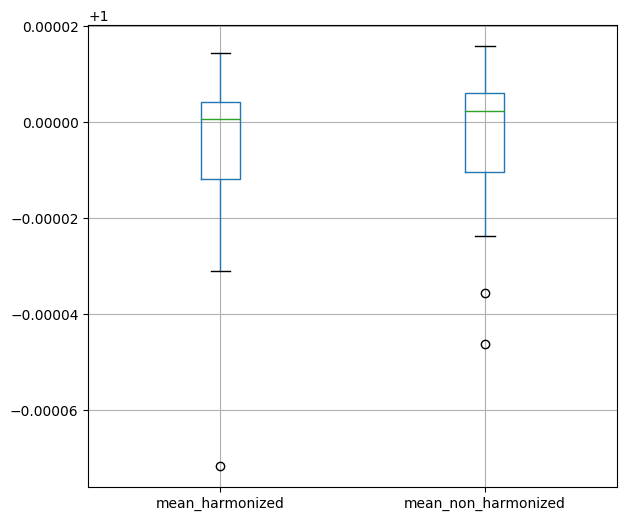

In [13]:
#Make a box plot of the mean and std of the harmonized and non-harmonized data in one plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
df.boxplot(column=["mean_harmonized", "mean_non_harmonized"])



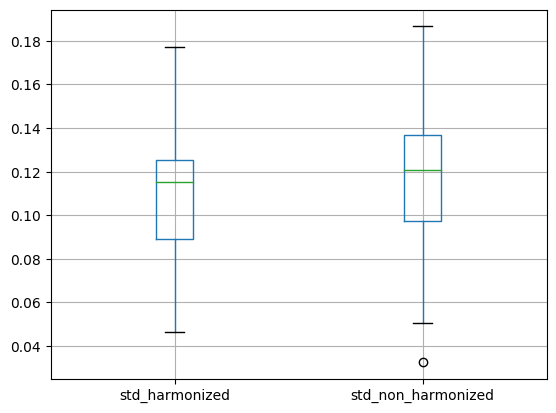

In [14]:
df.boxplot(column=["std_harmonized", "std_non_harmonized"])

In [15]:
import scipy.stats as stats
t_stat, p_value = stats.ttest_rel(df["mean_non_harmonized"], df["mean_harmonized"])
print(f'Paired t-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}')

Paired t-test: t-statistic = 1.38, p-value = 0.1797


In [36]:
def resample_image(image, new_size=(192, 192, 192)):
    # Calculate the original size and spacing
    original_size = np.array(image.GetSize(), dtype=int)
    original_spacing = np.array(image.GetSpacing(), dtype=float)

    # Calculate the new spacing based on the original size and new size
    new_spacing = (original_size * original_spacing) / new_size
    new_spacing = [float(spacing) for spacing in new_spacing]

    # Resample using SimpleITK
    resample = sitk.ResampleImageFilter()
    resample.SetOutputSpacing(new_spacing)
    resample.SetSize(new_size)
    resample.SetOutputDirection(image.GetDirection())
    resample.SetOutputOrigin(image.GetOrigin())
    resample.SetInterpolator(sitk.sitkBSpline)

    resampled_image = resample.Execute(image)
    return resampled_image

In [50]:
#Visualize the deformation field and the image slice 
image_case_fixed_non_harmonized = ants.image_read("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/resampled/resampled_test_masked_out_BONE/clipped_resampled_masked_COPDGene_G40486_BONE.nii.gz")

image_case_moving_non_harmonized = ants.image_read("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/resampled/resampled_test_masked_out_STANDARD/clipped_resampled_masked_COPDGene_G40486_STANDARD.nii.gz")

mask_non_harmonized_bone = ants.image_read("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks/test/inspiratory_BONE/lung_mask/COPDGene_G40486_BONE.nii.gz")
mask_non_harmonized_standard = ants.image_read("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks/test/expiratory_STANDARD/lung_mask/COPDGene_G40486_STANDARD.nii.gz")

mask_non_harmonized_bone = mask_non_harmonized_bone.numpy()
mask_non_harmonized_standard = mask_non_harmonized_standard.numpy()

mask_non_harmonized_bone[mask_non_harmonized_bone > 0] = 1
mask_non_harmonized_standard[mask_non_harmonized_standard > 0] = 1

sitk_bone_mask = sitk.GetImageFromArray(mask_non_harmonized_bone)
sitk_standard_mask = sitk.GetImageFromArray(mask_non_harmonized_standard)

resampled_bone_mask = resample_image(sitk_bone_mask)
resampled_standard_mask = resample_image(sitk_standard_mask) 


resampled_bone_mask = sitk.GetArrayFromImage(resampled_bone_mask)
resampled_standard_mask = sitk.GetArrayFromImage(resampled_standard_mask)

print(resampled_bone_mask.shape, resampled_standard_mask.shape)

#Convert simpleITK image to ANTs image
resampled_bone_mask = ants.from_numpy(resampled_bone_mask)
resampled_standard_mask = ants.from_numpy(resampled_standard_mask)


register = ants.registration(fixed=image_case_fixed_non_harmonized, moving=image_case_moving_non_harmonized, type_of_transform='SyN')



(192, 192, 192) (192, 192, 192)


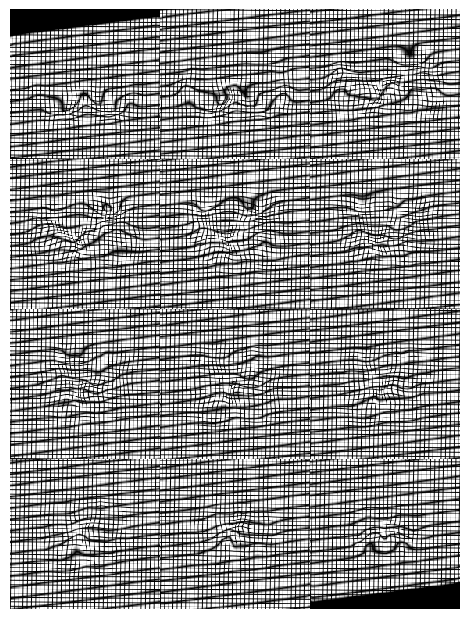

In [51]:
warped_grid = ants.create_warped_grid(image_case_moving_non_harmonized, grid_step=5, grid_width=1, grid_directions=(True, True), transform=register['fwdtransforms'], fixed_reference_image=image_case_fixed_non_harmonized)

ants.plot(warped_grid, axis=2)